In [1]:
import tensorflow as trf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
##Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
##Normalization
def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

    train_ds = train_ds.map(process)
    validation_ds = validation_ds.map(process)

In [4]:
##Create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


625/625 [==============================] - 1876s 3s/step - loss: 2.0871 - accuracy: 0.6363 - val_loss: 0.6315 - val_accuracy: 0.6490
Epoch 2/10
625/625 [==============================] - 1997s 3s/step - loss: 0.6072 - accuracy: 0.6833 - val_loss: 0.6733 - val_accuracy: 0.6138
Epoch 3/10
625/625 [==============================] - 1948s 3s/step - loss: 0.5792 - accuracy: 0.6963 - val_loss: 0.6612 - val_accuracy: 0.6832
Epoch 4/10
625/625 [==============================] - 1588s 3s/step - loss: 0.4613 - accuracy: 0.7786 - val_loss: 0.6773 - val_accuracy: 0.7078
Epoch 5/10
625/625 [==============================] - 1211s 2s/step - loss: 0.3549 - accuracy: 0.8403 - val_loss: 1.0775 - val_accuracy: 0.6702
Epoch 6/10
625/625 [==============================] - 1226s 2s/step - loss: 0.2762 - accuracy: 0.8842 - val_loss: 0.9062 - val_accuracy: 0.7118
Epoch 7/10
625/625 [==============================] - 1233s 2s/step - loss: 0.2274 - accuracy: 0.9090 - val_loss: 1.0393 - val_accurac

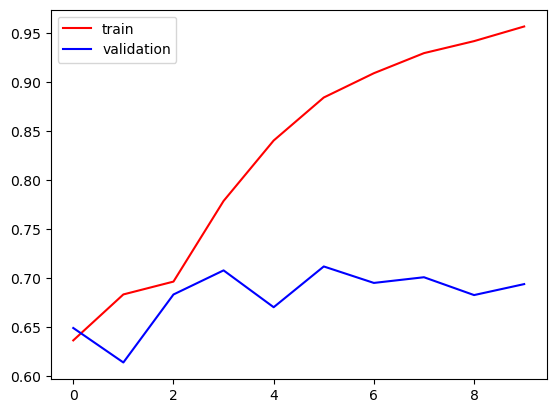

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

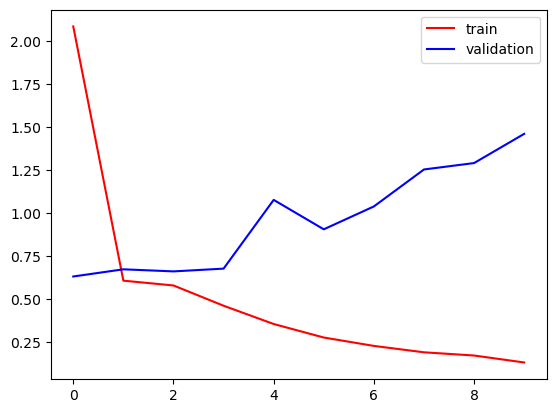

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [10]:
import cv2 as cv

In [17]:
test_img = cv.imread('dog2.jpg')

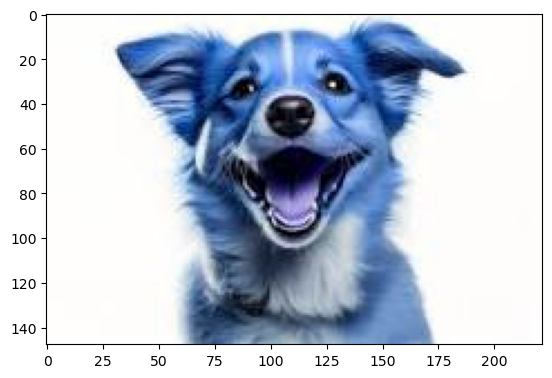

In [18]:
plt.imshow(test_img)

In [19]:
test_img.shape

(148, 222, 3)

In [20]:
test_img = cv.resize(test_img,(256,256))

In [21]:
test_input = test_img.reshape((1,256,256,3))

In [22]:
model.predict(test_input)

1/1 [==============================] - 0s 53ms/step


array([[0.8464427]], dtype=float32)